# set up

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
if OPENAI_API_KEY == None:
    # ask user to set OPENAI_API_KEY
    OPENAI_API_KEY = input("Please set OPENAI_API_KEY: ")
    os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY


# input product description text or file

In [2]:
text = ''
input_file = 'data/product_description.txt'

if not text or text == '':
    # read text from file
    with open(input_file, 'r') as file:
        text = file.read()

print(f"text: {text[:100]}")


text: Title: First Contact - Ultra Condensed Ligature Rich Sans Serif Font

URL Source: https://silverstag


# extrat tags, save frequences and  tag to title map


In [3]:
import sys
import os
from extraction.tag_processor import process_all_products

process_all_products([text])

Loading existing data. Found 1 product titles.
Loaded 14 tags, 1 titles, 3 synonyms, and 14 tag-to-book mappings.
Debug: Found title: First Contact - Ultra Condensed Ligature Rich Sans Serif Font
Extracted title: First Contact - Ultra Condensed Ligature Rich Sans Serif Font
Skipping document with title: First Contact - Ultra Condensed Ligature Rich Sans Serif Font
Skipping: Unable to process tags for this description


(defaultdict(int,
             {'font': 1,
              'designers': 1,
              'graphic_design': 1,
              'typography': 1,
              'sans serif': 1,
              'condensed font': 1,
              'ligature rich': 1,
              'all caps': 1,
              'multilingual support': 1,
              'bold': 1,
              'modern': 1,
              'branding': 1,
              'posters': 1,
              'unique': 1}),
 {'font': {'First Contact - Ultra Condensed Ligature Rich Sans Serif Font'},
  'designers': {'First Contact - Ultra Condensed Ligature Rich Sans Serif Font'},
  'graphic_design': {'First Contact - Ultra Condensed Ligature Rich Sans Serif Font'},
  'typography': {'First Contact - Ultra Condensed Ligature Rich Sans Serif Font'},
  'sans serif': {'First Contact - Ultra Condensed Ligature Rich Sans Serif Font'},
  'condensed font': {'First Contact - Ultra Condensed Ligature Rich Sans Serif Font'},
  'ligature rich': {'First Contact - Ultra Condensed L

# visualize tag frequency


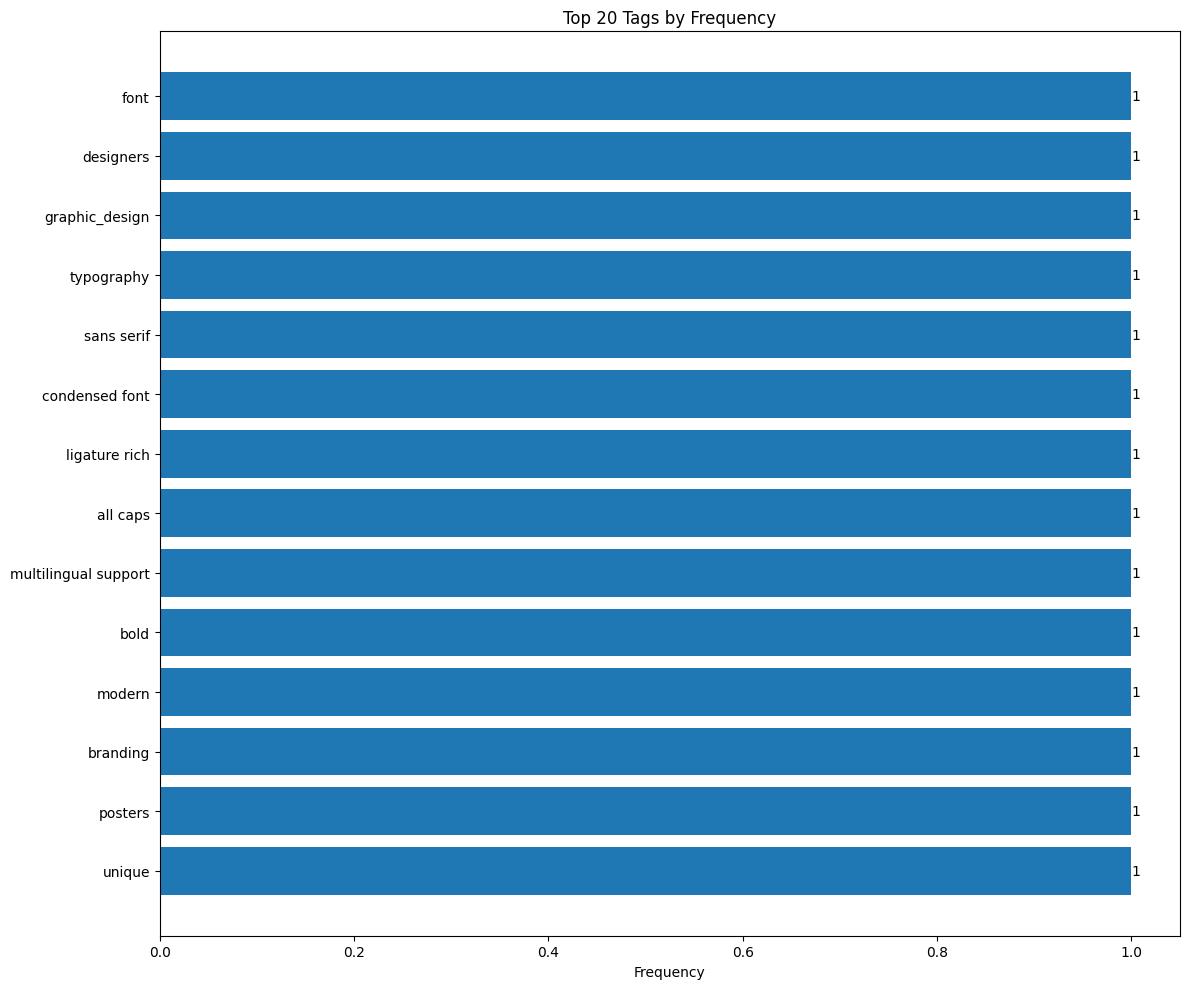


Detailed information for top 100 tags:

Tag: font (Frequency: 1)
Books: First Contact - Ultra Condensed Ligature Rich Sans Serif Font

Tag: designers (Frequency: 1)
Books: First Contact - Ultra Condensed Ligature Rich Sans Serif Font

Tag: graphic_design (Frequency: 1)
Books: First Contact - Ultra Condensed Ligature Rich Sans Serif Font

Tag: typography (Frequency: 1)
Books: First Contact - Ultra Condensed Ligature Rich Sans Serif Font

Tag: sans serif (Frequency: 1)
Books: First Contact - Ultra Condensed Ligature Rich Sans Serif Font

Tag: condensed font (Frequency: 1)
Books: First Contact - Ultra Condensed Ligature Rich Sans Serif Font

Tag: ligature rich (Frequency: 1)
Books: First Contact - Ultra Condensed Ligature Rich Sans Serif Font

Tag: all caps (Frequency: 1)
Books: First Contact - Ultra Condensed Ligature Rich Sans Serif Font

Tag: multilingual support (Frequency: 1)
Books: First Contact - Ultra Condensed Ligature Rich Sans Serif Font

Tag: bold (Frequency: 1)
Books: First 

In [4]:
from extraction.tag_processor import visualize_tag_frequency

visualize_tag_frequency('cache/new_products/tag_frequency.json')


# show search result

In [5]:
import tkinter as tk
from tkinter import ttk
import json

class TagDisplay:
    def __init__(self, tag_frequency):
        self.root = tk.Tk()
        self.root.title("Tag Frequency Display")
        self.tag_frequency = tag_frequency
        self.checkbox_vars = []  # Store references to BooleanVar objects

        self.create_widgets()

    def create_widgets(self):
        main_frame = ttk.Frame(self.root, padding="3 3 12 12")
        main_frame.grid(column=0, row=0, sticky=(tk.N, tk.W, tk.E, tk.S))
        self.root.columnconfigure(0, weight=1)
        self.root.rowconfigure(0, weight=1)

        canvas = tk.Canvas(main_frame)
        canvas.grid(column=0, row=0, sticky=(tk.N, tk.W, tk.E, tk.S))

        scrollbar = ttk.Scrollbar(main_frame, orient=tk.VERTICAL, command=canvas.yview)
        scrollbar.grid(column=1, row=0, sticky=(tk.N, tk.S))

        canvas.configure(yscrollcommand=scrollbar.set)
        canvas.bind('<Configure>', lambda e: canvas.configure(scrollregion=canvas.bbox("all")))

        inner_frame = ttk.Frame(canvas)
        canvas.create_window((0, 0), window=inner_frame, anchor="nw")

        ttk.Label(inner_frame, text="Showing", font=('Arial', 12, 'bold')).grid(column=0, row=0, sticky=tk.W, pady=(0, 10))

        for i, (tag, frequency) in enumerate(sorted(self.tag_frequency.items(), key=lambda x: x[1], reverse=True), start=1):
            var = tk.BooleanVar()
            self.checkbox_vars.append(var)  # Keep reference to var
            ttk.Checkbutton(inner_frame, text=f"{tag} ({frequency})", variable=var).grid(column=0, row=i, sticky=tk.W)

        self.root.protocol("WM_DELETE_WINDOW", self.on_closing)

    def on_closing(self):
        # Clean up resources
        for var in self.checkbox_vars:
            del var
        self.checkbox_vars.clear()
        self.root.destroy()

    def run(self):
        self.root.mainloop()

def load_tag_frequency(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Example usage
if __name__ == "__main__":
    file_path = 'cache/new_products/tag_frequency.json'
    tag_frequency = load_tag_frequency(file_path)
    app = TagDisplay(tag_frequency)
    app.run()